# EDA: Estadísticas Avanzadas en el fútbol

### Miguel Anguita Ruiz

Entre todos los debates e interpretaciones existentes en el mundo del fútbol, hay una certeza que lo rodea y que lo hace diferente al resto: es el único deporte en el que puedes ganar sin tirar ni una sola vez a la portería rival e incluso, sin marcar ningún gol. Es en estas contradicciones donde reside la belleza de este deporte tan imprevisible, donde los análisis más exaltados tienden, con frecuencia, cada vez más al resultadismo. Pues bien, en medio de todas estas contradicciones y polémicas, aparece la estadística avanzada para tratar de explicar de una manera científica este comportamiento, muchas veces irracional, acercando el dato a este deporte.

El siguiente dataset (Kaggle: https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg) reúne los datos de analítica avanzada de todos los equipos de 5 grandes ligas desde 2014 hasta 2019, en concreto, la Liga española, la Premier League inglesa, la Ligue 1 francesa, la Bundesliga alemana y la Serie A italiana. Lo que se busca es ver más allá de las simples variables que se nos puedan ocurrir involucradas en un partido de fútbol: pases, goles, asistencias, etc. Veremos una serie de métricas relativamente nuevas que nos ayudarán a ir un paso más allá en el análisis deportivo. 

Podríamos hacer una serie de preguntas interesantes, alejadas de las típicas de quién ha sido el equipo con más goles, con menos pases, etc. Por ejemplo, sería interesante observar los goles esperados por competición durante los años estudiados, o incluso el comportamiento de los distintos campeones de cada liga a lo largo del tiempo.
También podemos centrarnos en equipos de forma individual, en este caso hablaremos del Leicester City que ganó la Premier League en 2015 y del fantástico Granada CF que en 2019 consiguió clasificarse para competiciones europeas por primera vez en su historia.

A continuación se muestran los datos.


In [477]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

datos_total = pd.read_csv("understat.com.csv")
datos_total['pts'] = datos_total.wins * 3 + datos_total.draws 
datos_total['xGper'] = datos_total['xG'] / datos_total['matches']
datos_total = datos_total[datos_total.league != "RFPL"]
datos_total.loc[datos_total.team == 'Barcelona']

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,xGper
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813,2.710004
20,La_liga,2015,1,Barcelona,38,29,4,5,112,29,...,5.029090,33.285940,66.191080,6.012152,15.064390,570,163,94.3800,3.3800,2.989428
41,La_liga,2016,2,Barcelona,38,28,6,4,116,37,...,-5.684337,31.315663,55.546571,6.702330,15.710111,552,144,87.9535,-2.0465,2.461884
60,La_liga,2017,1,Barcelona,38,28,9,1,99,29,...,12.620820,40.134388,46.635974,9.109883,13.939373,528,188,79.4375,-13.5625,2.381230
80,La_liga,2018,1,Barcelona,38,26,9,3,90,36,...,8.930950,43.444400,33.140304,9.015264,16.404885,417,171,73.9604,-13.0396,2.191567
101,La_liga,2019,2,Barcelona,38,25,7,6,86,38,...,-0.176051,32.620992,34.928789,8.256988,17.961598,440,146,73.1381,-8.8619,1.894985


Tenemos 588 filas y 25 columnas, habiéndose creado dos nuevas a partir de algunas ya existentes: 'pts' y 'xGper'. Explicamos a grosso modo en qué consisten algunas de estas variables:

- xG: goles esperados. 

- xG_diff: diferencia entre goles esperados y marcados.

- npxG: goles esperados sin contar penaltis ni propia meta.

- xGA: goles en contra esperados.

- xGA_diff: diferencia entre goles encajados esperados y goles encajados reales.

- npxGA: goles encajados esperados sin contar penaltis ni propia meta.

- ppda_coef: pases permitidos por acción defensiva en campo contrario.

- oppda_coef: pases del rival permitidos por acción defensiva en campo contrario.

- deep: pases en el último tercio completados.

- deep_allowed: pases del rival en el último tercio completados.

- xpts: - puntos esperados.

- xpts_diff: diferencia entre puntos esperados y reales.

- xGper: puntos esperados por partido.

¿Tenemos datos missings? 

In [476]:
datos_total.isna().sum()

league          0
year            0
position        0
team            0
matches         0
wins            0
draws           0
loses           0
scored          0
missed          0
pts             0
xG              0
xG_diff         0
npxG            0
xGA             0
xGA_diff        0
npxGA           0
npxGD           0
ppda_coef       0
oppda_coef      0
deep            0
deep_allowed    0
xpts            0
xpts_diff       0
xGper           0
dtype: int64

En efecto, se trata de un dataset bastante limpio, sin datos faltantes que nos puedan complicar el análisis.
A continuación, podemos intentar averiguar el estilo de cada liga comparando sus xG medios por partido para cada año.

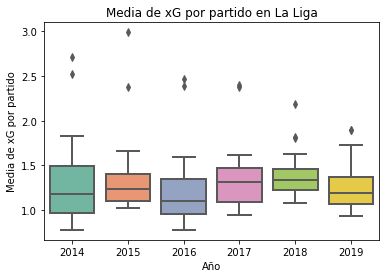

In [443]:
spain_total = datos_total[(datos_total.league == "La_liga")]
sns.boxplot(x = 'year', y = 'xGper', data = spain_total,
            color = "red", palette = 'Set2', linewidth = 2);
plt.title("Media de xG por partido en La Liga")
plt.xlabel("Año")
plt.ylabel("Media de xG por partido")
plt.savefig("mediaXGliga.png");

En la liga española, se hace visible la superioridad de los dos equipos más poderosos y con más presupuesto,
FC Barcelona y Real Madrid, siendo outliers prácticamente en cada temporada por sus grandes cifras en goles 
esperados. Especialmente llamativa resultó la temporada 2015/2016, en la que lo más probable era que el Barça marcase prácticamente 3 goles por partido (terminaron marcando 112), una absoluta barbaridad. Quitando Barça y Madrid, el resto de equipos no llega a un xG de 2 en ningún año, dato preocupante.

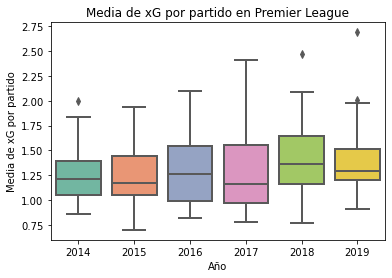

In [444]:
premier_total = datos_total[(datos_total.league == "EPL")]
sns.boxplot(x = 'year', y = 'xGper', data = premier_total,
            color = "red", palette = 'Set2', linewidth = 2);
plt.title("Media de xG por partido en Premier League");
plt.xlabel("Año");
plt.ylabel("Media de xG por partido");
plt.savefig("mediaXGpremier.png");

En la Premier League se aprecia algo más de igualdad en los puestos de arriba respecto a la Liga española. 
Además, se aprecia una clara subida en este índice de goles esperados en los últimos años respecto a 2014 o 2015, acentuándose esto en 2019 subiendo claramente los máximos y mínimos. Esto se puede deber a la cantidad de 
talento ofensivo que se ha llevado la Premier League de otras ligas, por su gran poder económico.

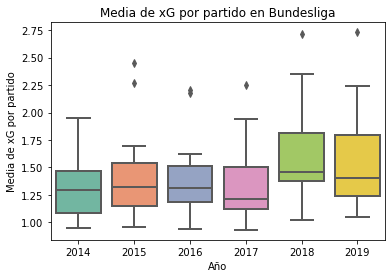

In [445]:
bund_total = datos_total[(datos_total.league == "Bundesliga")]
sns.boxplot(x = 'year', y = 'xGper', data = bund_total,
            color = "red", palette = 'Set2', linewidth = 2);
plt.title("Media de xG por partido en Bundesliga");
plt.xlabel("Año");
plt.ylabel("Media de xG por partido");
plt.savefig("mediaXGbund.png");

En cuanto a la Bundeslga, el aumento de goles esperados es más notorio aun que en la Premier League,
observándose en 2018 y 2019 un claro cambio de tendencia. Equipos como el Borussia Dortmund 
(con la llegada de Haaland) o el RB Leipzig han acumulado una gran cantidad de talento ofensivo que
también se hace patente en competiciones como la Champions League.

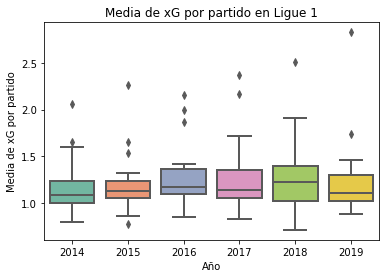

In [446]:
ligue_total = datos_total[(datos_total.league == "Ligue_1")]
sns.boxplot(x = 'year', y = 'xGper', data = ligue_total,
            color = "red", palette = 'Set2', linewidth = 2);
plt.title("Media de xG por partido en Ligue 1");
plt.xlabel("Año");
plt.ylabel("Media de xG por partido");
plt.savefig("mediaXGligue.png");

Al contrario que en las otras ligas analizadas, los índices de goles esperados en la liga francesa son muy bajos,
habiendo aun mas diferencia entre los equipos de arriba (PSG, Mónaco, Lyon...) y abajo que en la liga española.

Otra pregunta interesante que podemos hacernos es la siguiente: ¿cuántos puntos ha necesitado cada equipo campeón durante esos años para llegar a semejante logro? Lo vemos en los siguientes gráficos.

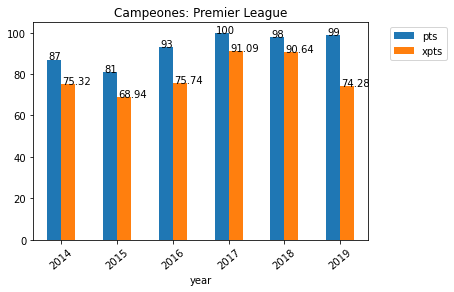

In [448]:
premier = datos_total[datos_total.league == 'EPL']
liga = datos_total[datos_total.league == 'La_liga']
campeones = datos_total[datos_total.position == 1]

fig, ax = plt.subplots()
campeones[campeones.league == "EPL"].plot.bar(x = 'year', y = ['pts', 'xpts'], rot = 40, ax = ax);
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.title("Campeones: Premier League")
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/10., p.get_height()))
plt.savefig("campeones_premier.png");

En la Premier League destacan los puntos del campeón en las ligas de 2017, 2018, y 2019, siendo esta última
especialmente destacada pues el campeón (Liverpool), no llegó a los 75 puntos esperados, lo que indica 
que el equipo entrenado por Klopp aprovechó al máximo sus ocasiones de gol y aguantó en la mayoría de 
ocasiones las ocasiones claras del rival.

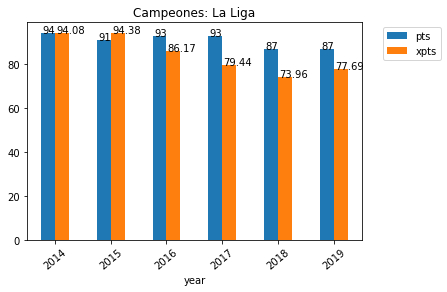

In [449]:
fig, ax = plt.subplots()
campeones[campeones.league == "La_liga"].plot.bar(x = 'year', y = ['pts', 'xpts'], rot = 40, ax = ax);
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.title("Campeones: La Liga")
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/10., p.get_height()))
plt.savefig("campeones_liga.png");

En la liga española, la tendencia es contraria lo que ocurre en Premier League, necesitando el campeón 
de menos puntos para proclamarse campeón, incluyendo también estadísticas bajas de puntos esperados.

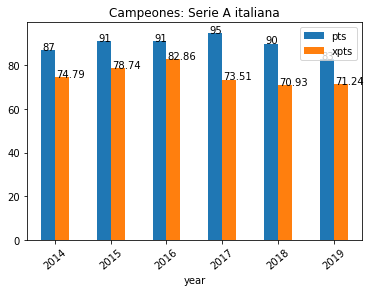

In [453]:
fig, ax = plt.subplots()
campeones[campeones.league == "Serie_A"].plot.bar(x = 'year', y = ['pts', 'xpts'], rot = 40, ax = ax);
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.title("Campeones: Serie A italiana")
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/10., p.get_height()))
plt.savefig("campeones_serie.png");

En la Serie A italiana, no parece que haya habido un cambio de tendencia grande en cuanto a la distribución de 
puntos del campeón, estando el valor de puntos esperados cercano a la barrera de los 70-80 en casi todos los años. 
En 2017, la Juventus se proclamó campeón obteniendo 22 puntos más de la cifra esperada, con una gran defensa y 
una delantera con Dybala e Higuaín como jugadores más destacados.

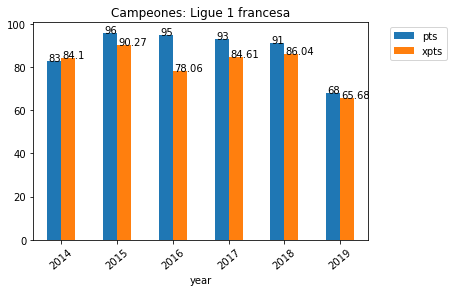

In [451]:
fig, ax = plt.subplots()
campeones[campeones.league == "Ligue_1"].plot.bar(x = 'year', y = ['pts', 'xpts'], rot = 40, ax = ax);
plt.legend(bbox_to_anchor=(1.05, 1), loc = 'upper left')
plt.title("Campeones: Ligue 1 francesa")
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/10., p.get_height()))
plt.savefig("campeones_ligue.png");

Respecto a la liga francesa, en la liga 2019/20 el PSG se proclamó campeón con 68 puntos, hecho que fue así 
por la abrupta suspensión de la competición pasadas 27 jornadas debido al coronavirus, sin poder reanudarse
posteriormente.

Nos centramos a continuación en los casos de dos equipos que triunfaron en dos años concretos de forma inesperada, 
uno como todo un campeón de la Premier League y otro como flamante clasificado de Europa League, hablamos del
Leicester City y del Granada CF.

In [483]:
# Función que realiza el gráfico biplot

def biplot(score,coeff,df,fig,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    X = xs * scalex
    Y = ys * scaley
    
    plt.scatter(X,Y,s=5)
    etiquetas = list(df.index)
    for i, label in enumerate(etiquetas):
        plt.text(X[i], Y[i], label)
  
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], 
                     color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    plt.savefig(fig)


## Caso de estudio: Leicester City

In [467]:
leicester_total = datos_total[datos_total.team == "Leicester"]
premier_2015 = datos_total[(datos_total.league == "EPL") & (datos_total.year == 2015)]
leicester_total['xGper'] = leicester.xG / 38
leicester_total

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,xGper
133,EPL,2014,14,Leicester,38,11,8,19,46,55,...,1.392116,53.347435,-8.185714,10.229308,8.019074,191,287,44.6400,3.6400,1.268589
140,EPL,2015,1,Leicester,38,23,12,3,68,36,...,9.019954,41.975274,16.545593,10.099471,8.602384,217,275,68.9442,-12.0558,1.800422
172,EPL,2016,13,Leicester,38,12,8,18,48,63,...,-11.695627,48.259735,-8.602775,12.374472,8.763966,196,279,48.1195,4.1195,1.166864
188,EPL,2017,9,Leicester,38,12,11,15,56,60,...,-10.641277,46.314037,-0.592296,12.774866,10.123776,183,268,55.8547,8.8547,1.323387
209,EPL,2018,10,Leicester,38,15,7,16,51,48,...,-3.357415,40.836749,5.949230,12.790205,11.480873,205,253,56.2378,4.2378,1.371425
224,EPL,2019,5,Leicester,38,18,8,12,67,41,...,6.894043,40.282434,15.391501,9.118037,14.196062,293,203,61.1553,-0.8447,1.605715


Filtramos los datos pertenecientes al Leicester y obtenemos 6 filas, una por cada temporada. Nos fijamos en
la temporada 2015, año en el que el Leicester se proclamó de forma sorpresiva como campeón de la Premier League, 
con un equipo sin estrellas y que el año anterior había sufrido para mantener la categoría. 

Observando los datos, parece que destacó especialmente en 3 categorías, con un gran cambio respecto a otros años.

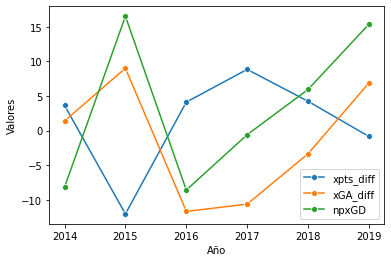

In [468]:
sns.lineplot(x = 'year', y = 'xpts_diff', marker = "o",
             data = leicester_total);
sns.lineplot(x = 'year', y = 'xGA_diff', marker = "o",
             data = leicester_total);
sns.lineplot(x = 'year', y = 'npxGD', marker = "o",
             data = leicester_total);
plt.legend(loc = 'lower right', labels = ['xpts_diff', 'xGA_diff', 'npxGD'])
plt.xlabel("Año")
plt.ylabel("Valores");
plt.savefig("leicester_metricas")

En efecto, se observa un gran cambio en 2015 respecto a otros años en las categorías de diferencia de puntos
esperados, diferencia de goles encajados esperados y diferencia entre goles conseguidos y encajados esperados.
Consiguieron más de 12 puntos de lo esperado, en parte por la gran defensa que mostraron durante toda la temporada, apreciándose esto en la variable xGA_diff, con la consecuencia de tener un buen equilibrio entre goles
conseguidos esperados y encajados esperados.

A continuación, realizo un Análisis de Componentes Principales para condensar la mayor parte de información 
posible en un gráfico de dos dimensiones (siendo posible esto pues las dos primeras componentes explican casi 
el 80 % de la varianza).

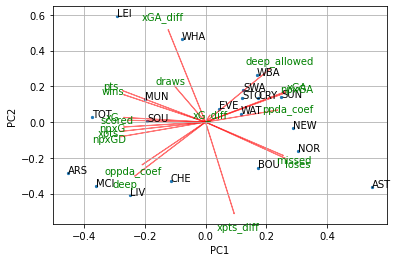

In [482]:
iniciales = ['LEI', 'ARS', 'TOT', 'MUN', 'MCI', 'SOU', 'WHA', 'LIV',
             'STO', 'CHE','SWA', 'EVE', 'WAT', 'WBA', 'CRY', 'BOU', 
            'SUN', 'NEW', 'NOR', 'AST']
premier2015_st = StandardScaler().fit_transform(premier_2015.loc[:, 'wins':'xpts_diff'])
premier2015_st = pd.DataFrame(premier2015_st, columns = premier_2015.columns[5:24], index = iniciales)
premier2015_st

## PCA
pcamodel = PCA()
pca_scores = pcamodel.fit_transform(premier2015_st)
pcamodel.explained_variance_ratio_.cumsum()

biplot(pca_scores[:,0:2],np.transpose(pcamodel.components_[0:2, :]), 
       premier2015_st, "premier_2015" ,list(premier2015_st.columns))
plt.show()

Puede observarse que el Leicester se encuentra muy separado del grupo de Arsenal, Manchester City, Liverpool o Chelsea, es decir, ganó la Premier League jugando muy distinto respecto a estos equipos. En concreto, observamos que destaca en la variable de goles recibidos esperados, es decir, encajó 36 goles cuando lo esperado es que recibiese en torno a 45 goles. Esto quiere decir que hubo partidos en los que recibió muchas ocasiones de gol que supo aguantar. Desde luego, el portero Schmeichel y los 4 defensas titulares rindieron a un nivel excelso durante toda la temporada. También destacaron en ataque pues fue el tercer equipo más goleador, pero no destacó en goles esperados pues incluso marcó algo menos de lo previsto por ocasiones de gol realizadas.

Veamos detenidamente la variable xGA_diff.

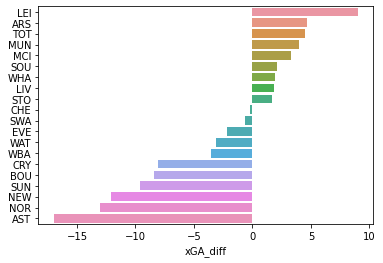

In [309]:
xga_diff = premier_2015.sort_values(by = ['xGA_diff'], ascending = False)['xGA_diff']
sns.barplot(x = xga_diff, y = iniciales, 
            orient = 'h')
plt.savefig("xgadiff_premier2015.png");

En efecto, fue el mejor equipo de toda la Premier League en lo que a defensa se refiere, encajando muchos menos goles respecto al valor esperado.

## Caso de estudio: Granada CF

In [332]:
granada_total = datos_total[datos_total.team == "Granada"]
liga_2019 = datos_total[(datos_total.league == "La_liga") & (datos_total.year == 2019)]
granada_total

,league,year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
16,La_liga,2014,17,Granada,38,7,14,17,29,64,...,54.283784,-9.716216,51.310678,-18.383080,8.924796,7.551742,117,206,45.7345,10.7345
36,La_liga,2015,17,Granada,38,10,9,19,46,69,...,62.374920,-6.625080,58.658524,-22.508105,8.999245,7.241976,117,268,38.4994,-0.5006
59,La_liga,2016,20,Granada,38,4,8,26,30,82,...,74.025170,-7.974830,71.052059,-42.208772,12.012298,8.256404,113,307,26.4951,6.4951
106,La_liga,2019,7,Granada,38,16,8,14,52,45,...,43.439237,-1.560763,39.723106,1.581915,10.176947,7.772832,135,197,52.5969,-3.4031


Filtramos los datos pertenecientes al Granada y obtenemos 4 filas, ya que en las temporadas 2017 y 2018 estaba
en Segunda División tras descender en 2016. No hay más que ver el contraste entre este año 2016, una de las
peores temporadas en Primera División del Granada respecto al año 2019, probablemente el año de más éxitos
del conjunto nazarí, añadiendo a este logro en liga una semifinal en Copa del Rey, siendo eliminado in extremis
por el Athletic Club.

La categoría que más llama la atención es la de npxGD, diferencia entre goles realizados y encajados esperados,
siendo de -42 en 2016 y positiva el mismo año del ascenso, en 2019.

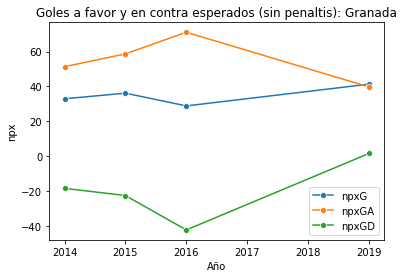

In [329]:
sns.lineplot(x = 'year', y = 'npxG', marker = "o",
             data = granada_total);
sns.lineplot(x = 'year', y = 'npxGA', marker = "o",
             data = granada_total);
sns.lineplot(x = 'year', y = 'npxGD', marker = "o",
             data = granada_total);
plt.legend(labels=['npxG', 'npxGA', 'npxGD'])
plt.title("Goles a favor y en contra esperados (sin penaltis): Granada")
plt.xlabel("Año")
plt.ylabel("npx");
plt.savefig("granada_dif_npx.png")

Realizamos un Análisis de Componentes Principales.

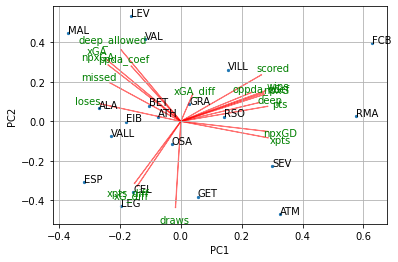

In [471]:
iniciales = ['RMA', 'FCB', 'SEV', 'ATM', 'VILL', 'RSO', 'GRA', 'GET',
            'VAL', 'OSA', 'ATH', 'LEV', 'VALL', 'EIB', 'BET', 'ALA',
            'CEL', 'LEG', 'MAL', 'ESP']
liga2019_st = StandardScaler().fit_transform(liga_2019.loc[:, 'wins':'xpts_diff'])
liga2019_st = pd.DataFrame(liga2019_st, columns = liga_2019.columns[5:24], index = iniciales)
liga2019_st

## PCA
pcamodel = PCA()
pca_scores = pcamodel.fit_transform(liga2019_st)
pcamodel.explained_variance_ratio_.cumsum()

biplot(pca_scores[:,0:2],np.transpose(pcamodel.components_[0:2, :]), 
       liga2019_st, "liga_2019" ,list(liga2019_st.columns))
plt.show()


El Granada no destacó respecto a los mejores equipos en ninguna categoría, pero supo mantener 
el equilibrio y no quedarse atrás en ninguna tampoco, estando en el gráfico cerca de los equipos de la 
zona media-alta de la tabla (Villarreal, Real Sociedad, Sevilla...). Esto ya de por sí era un logro, 
pues el Granada jamás había podido competir durante tantas jornadas con este tipo de equipos. Por supuesto,
Barcelona y Madrid se hallan muy separados del resto de equipos.

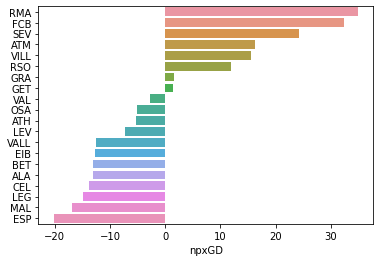

In [343]:
npxGD = liga_2019.sort_values(by = ['npxGD'], ascending = False)['npxGD']
sns.barplot(x = npxGD, y = iniciales, 
            orient = 'h')
plt.savefig("npxGD_liga2019.png");

Finalmente, en este gráfico podemos observar como el Granada fue de los pocos equipos con balance positivo
de goles encajados vs realizados esperados. Una gran defensa, encabezada por los centrales Duarte y Germán además 
del portero Rui Silva, un mediocampo top formado por Milla, Gonalons, Montoro y Yangel Herrera, y una delantera 
con el incombustible Roberto Soldado, hicieron de la temporada 19/20 un año inolvidable para los aficionados
(entre los que me incluyo) del Granada.

Hemos podido ver a lo largo de este trabajo la potencia de las variables "Expected", siendo tenidas en cuenta ya
en la mayoría de análisis de datos de índole futbolero. El avance tecnológico, que posibilita detectar cualquier 
variable en todos los eventos posibles, facilita la utilización de estas métricas, a la vez que en los próximos 
años se seguirán introduciendo otras nuevas que vayan enriqueciendo a este deporte.